# ARIM-Academy：　機器データ利活用ユースケース
### 機器：UV-Vis分光装置
### 分析：回帰分析（ランダムフォレスト、特徴量重要度の抽出）

### 教材への接続
google colabにおけるオンラインの場合にこのラインを実行します。（<font color="red">Google colabに接続しない場合には不要</font>）

In [ ]:
!git clone https://github.com/ARIM-Usecase/Example_4.git
%cd Example_4

### ライブラリのインポート
コード実行で必要なpythonのライブラリをimport文でロードします。

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Feature Importance
from sklearn.ensemble import RandomForestRegressor

## 1.データセットの読み込みと前処理
pandasライブラリのread_excel()関数は、Excelファイルを読み込んでpandasのDataFrame形式に変換する関数です。ここでは[data]フォルダーにあるdata_all_train.xlsxファイルをDataFrameとして読み込み、その結果をdfという変数に格納します。35288のサンプルに対して5の特徴量からなるデータ行列となっています。

In [2]:
# データの読み込み
df = pd.read_excel("./data/data_all_train.xlsx")
df

,WL,B,G,R,Abs
0,700,36.062290,152.944587,211.836212,0.0289
1,699,36.062290,152.944587,211.836212,0.0299
2,698,36.062290,152.944587,211.836212,0.0274
3,697,36.062290,152.944587,211.836212,0.0286
4,696,36.062290,152.944587,211.836212,0.0288
...,...,...,...,...,...
35283,304,41.790282,32.994382,74.068052,0.4184
35284,303,41.790282,32.994382,74.068052,0.4192
35285,302,41.790282,32.994382,74.068052,0.4215
35286,301,41.790282,32.994382,74.068052,0.4239


### 説明変数と目的変数
５つの特徴量のうち、[Abs]を目的変数(y_train)、他の４つを説明変数（X_train）と分割します。

In [3]:
#説明変数と目的変数の設定
X_train = df.drop(["Abs"], axis=1)
y_train = df["Abs"]

## 2.機械学習
### ランダムフォレスト回帰の適用
1. `RandomForestRegressor` モデルを `n_estimators=60` で作成し、60本の決定木を持つランダムフォレスト回帰器を用意します。
2. `fit` メソッドを使って、`X_train` に含まれる特徴量と、それに対応するターゲット変数 `y_train` を使ってモデルを訓練します。これにより、モデルが `X_train` の特徴と `y_train` のターゲットの関係を学習し、将来的に新しいデータに対する予測が可能になります

In [4]:
# モデルの学習
rfr = RandomForestRegressor(n_estimators=60)
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=60)

【解説】このコードでは、ランダムフォレスト回帰モデル（`RandomForestRegressor`）を使用して、モデルを訓練データに基づいて学習させています。

### 1. `rfr = RandomForestRegressor(n_estimators=60)`
- `RandomForestRegressor` は、ランダムフォレストアルゴリズムを用いた回帰モデルです。ランダムフォレストは、複数の決定木（ディシジョンツリー）を使って予測を行い、それらの結果を平均化することで、より正確でロバストな予測を提供します。
  
- `n_estimators=60` という引数は、**決定木の数**を指定しています。ここでは、ランダムフォレストモデルに60本の決定木を使用することを意味しています。これにより、複数の決定木がそれぞれ異なる特徴のサブセットを使って予測し、その平均を最終的な予測値とします。一般的に、決定木の数が多いほど予測精度が向上しますが、計算時間も長くなります。

- `rfr` という変数に、このモデルのインスタンスが格納されます。

### 2. `rfr.fit(X_train, y_train)`
- `.fit(X_train, y_train)` は、ランダムフォレストモデルを訓練（学習）させるためのメソッドです。
  
- `X_train` はモデルの**入力特徴量**のデータセットです。これは、説明変数（特徴量）が含まれているデータフレームや配列です。

- `y_train` はモデルの**ターゲット変数**、つまり予測したい目的変数の値です。これは回帰分析で目的とする「正解」の値であり、これを基にモデ、訓練データを基に学習した状態になります。

### 特徴量重要度の抽出
`RandomForestRegressor` モデルの特徴量重要度 (`feature_importances_`) を `pandas.Series` に変換して、特徴量名をインデックスとして持つシリーズを作成します。

In [5]:
# 特徴量重要度の抽出
feature_importance = pd.Series(rfr.feature_importances_, index=X_train.columns)
feature_importance

WL    0.551208
B     0.094182
G     0.072487
R     0.282124
dtype: float64

【解説】：

### 1. `rfr.feature_importances_`
- `rfr` は `RandomForestRegressor` のインスタンスで、すでに `fit` メソッドを使って訓練されたランダムフォレストモデルです。
- `feature_importances_` は、訓練されたランダムフォレストモデルから計算される各特徴量の重要度（どれだけ予測に貢献したか）を表す属性です。これは、各特徴量に対するスコアのリストで、値が大きいほどその特徴量の重要度が高いことを示します。

### 2. `pd.Series(rfr.feature_importances_, index=X_train.columns)`
- `pd.Series()` は、`pandas` のシリーズオブジェクトを作成するための関数です。
- `rfr.feature_importances_` は、`RandomForestRegressor` モデルによって計算された特徴量の重要度のリストです。このリストを `pd.Series` に変換しています。
- `index=X_train.columns` は、シリーズのインデックス（ラベル）として `X_train` データフレームの列名（特徴量名）を設定しています。これにより、各特徴量とその重要度を対応だけ予測に影響を与えたかが分かりやすく整理されます。

### 可視化の準備
LaTeX形式の数式を文字列としてリストに格納しています。それぞれの項目は、グラフのx軸ラベルなどで使われることを目的としています。

In [9]:
x = [r'$\mathregular{WL}$', r'$\mathregular{B}$', r'$\mathregular{G}$', r'$\mathregular{R}$']
y = feature_importance.values



#### 1. `x = [...]`
- `x` はリストです。このリストには4つの文字列が含まれています。

#### 2. `r'...'` の部分
- `r` は「raw string（生文字列）」を意味します。Pythonの生文字列では、バックスラッシュ `\` をエスケープシーケンス（例: `\n` や `\t`）として扱わず、そのまま文字列の一部として扱います。ここでは、LaTeXの数式形式で使われるバックスラッシュをそのまま解釈させるために使用されています。

#### 3. `$\mathregular{...}$`
- `$...$` は、LaTeXで数式を囲むための記法です。`matplotlib` では、LaTeX形式の数式をグラフ内でレンダリングすることができます。
- `\mathregular{...}` は、LaTeXのコマンドで、指定された文字列を通常の数式記号として扱い、フォントを通常のテキストフォントに変更するものです。

#### 4. それぞれの文字列の意味
- `r'$\mathregular{WL}$'`：`WL` という文字列を数式として表示します。
- `r'$\mathregular{B}$'`：`B` という文字列を数式として表示します。
- `r'$\mathregular{G}$'`：`G` という文字列を数式として表示します。
- `r'$\mathregular{R}$'`：`R` という文字列を数式として表示します。

### 結果として何が起こるか？
このリスト `x` の要素は、`matplotlib` のグラフの x 軸ラベルなどで使用される際に、LaTeX形式でフォーマットされた文字列として描画されます。具体的には、`'WL'`, `'B'`, `'G'`, `'R'` といったラベルが、LaTeXフォーマットで美しく描画されます。

例えば、このリストは以下のように `matplotlib` の `plt.xticks()` 関数などで使用され、x軸のラベルに設定されることがよくあります。

In [7]:
# 特徴量の可視化設定

def plot_feature_importance(importance, labels, filename='feature_importance.png'):
    plt.figure(figsize=(10, 8))
    ax = plt.gca()

    # 軸の線幅設定
    for spine in ax.spines.values():
        spine.set_linewidth(2.0)

    # barプロット作図
    plt.bar(labels, importance, color='blue')

    # フォントとラベルの設定
    plt.yticks(fontproperties='Times New Roman', size=24, weight='black')
    plt.xticks(fontproperties='Times New Roman', size=24, weight='black')
    plt.tick_params(axis='y', width=2, length=6)
    plt.tick_params(axis='x', width=2, length=6)
    
    plt.xlabel('Descriptors', fontdict={'family': 'Times New Roman', 'weight': 'black', 'size': 28})
    plt.ylabel('Feature Importance', fontdict={'family': 'Times New Roman', 'weight': 'black', 'size': 28})

    plt.ylim(0, 0.6)
    
    # プロットの保存と表示
    plt.savefig(filename, dpi=300)
    plt.show()

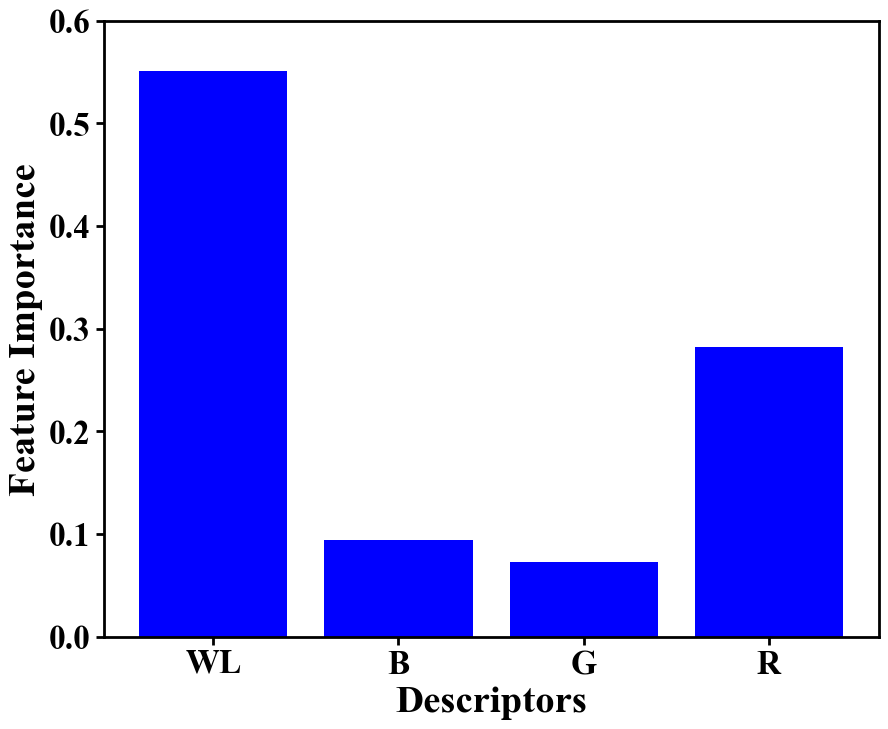

In [8]:
# プロット作成
plot_feature_importance(y, x)